In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
file_path = '/kaggle/input/housing-prices-dataset/Housing.csv'
df = pd.read_csv(file_path)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])
df['basement'] = label_encoder.fit_transform(df['basement'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0


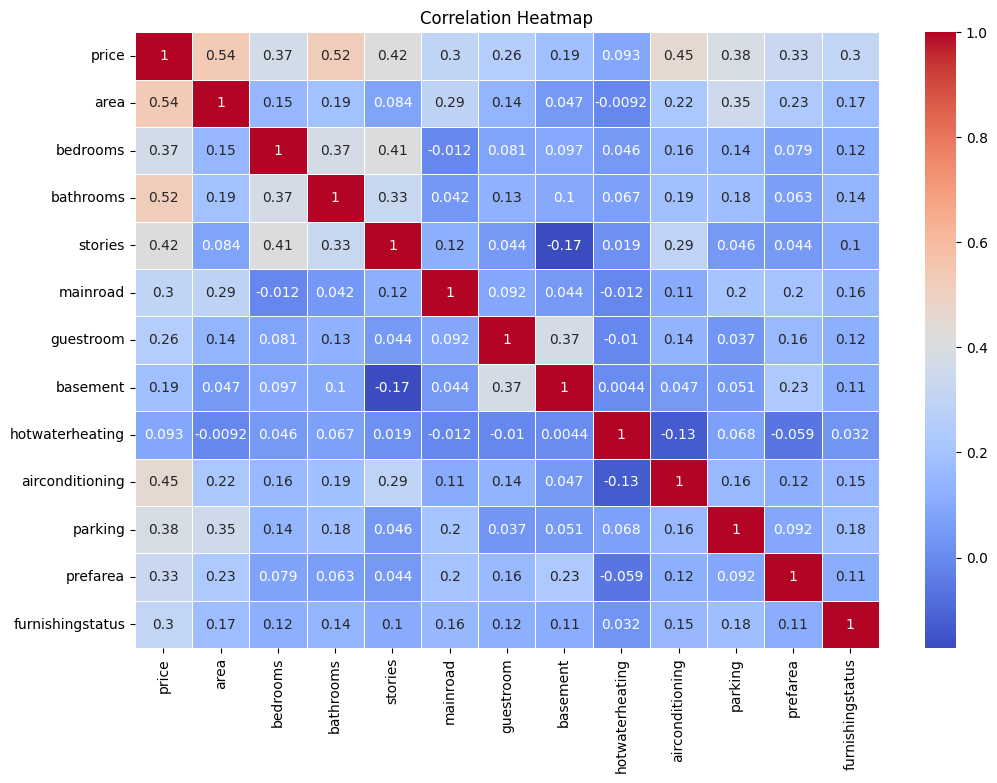

In [11]:
ndf = df.select_dtypes(include=[np.number])
correlation_matrix = ndf.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"  Mean Squared Error: {mse_linear}")
print(f"  R^2 Score: {r2_linear}")

  Mean Squared Error: 1535047758428.0508
  R^2 Score: 0.6435419628959105


In [13]:
rf_model=RandomForestRegressor(n_estimators=1000,random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print(f"  Mean Squared Error: {mse_rf}")
print(f"  R^2 Score: {r2_rf}")

  Mean Squared Error: 1822470461642.958
  R^2 Score: 0.5767986762166386


In [18]:
xg_model=XGBRegressor(n_estimators=1000,random_state=42)
xg_model.fit(X_train,y_train)
y_pred_xg=xg_model.predict(X_test)
mse_xg=mean_squared_error(y_test,y_pred_xg)
r2_xg=r2_score(y_test,y_pred_xg)
print(f"  Mean Squared Error: {mse_xg}")
print(f"  R^2 Score: {r2_xg}")

  Mean Squared Error: 2143808962177.1833
  R^2 Score: 0.5021797006717352
